In [12]:
import sf_segmenter
import os
import matplotlib.pyplot as plt
import numpy as np

INPUT_PATH = "take_on_me.mid"
CONFIG = {
    "M_gaussian": 27,
    "m_embedded": 3,
    "k_nearest": 0.04,
    "Mp_adaptive": 28,
    "offset_thres": 0.05,
    "bound_norm_feats": np.inf  # min_max, log, np.inf,
                                # -np.inf, float >= 0, None
    # For framesync features
    # "M_gaussian"    : 100,
    # "m_embedded"    : 3,
    # "k_nearest"     : 0.06,
    # "Mp_adaptive"   : 100,
    # "offset_thres"  : 0.01
}

segmenter = sf_segmenter.Segmenter(config=CONFIG)
segmenter.proc_midi(INPUT_PATH)

 > 0
 > 1
 > 2
 > 3
 > 4
 > 5
 > 6
 > 7
 > 8
 > 9
 > 10


(array([  0,  21, 147, 200, 261, 314, 366, 394, 467, 535, 580, 629]),
 array([0., 0., 1., 2., 3., 0., 4., 0., 1., 1., 3.]))

 [o] save to ... None


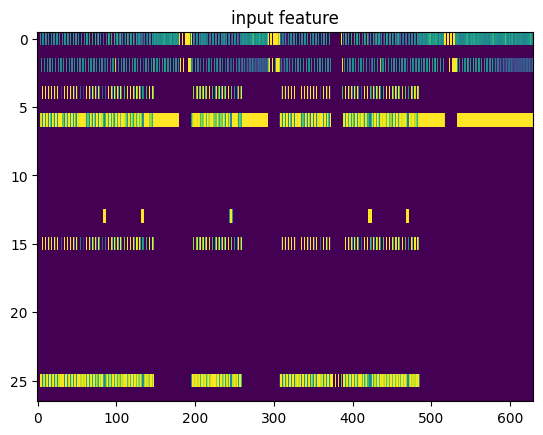

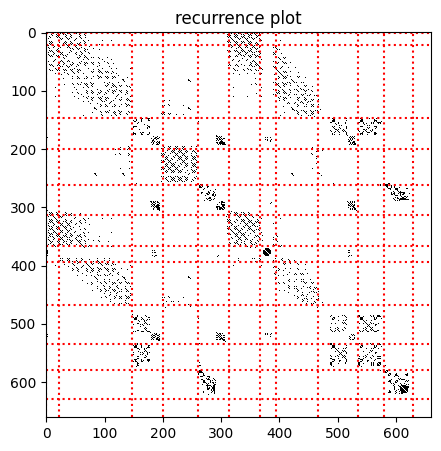

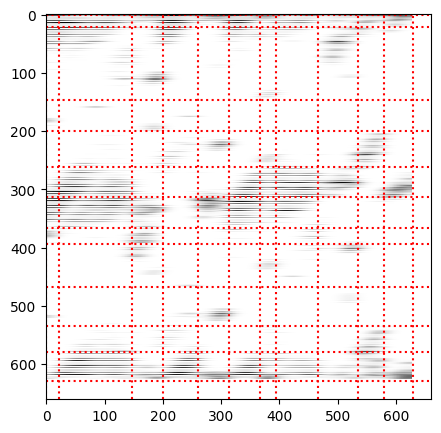

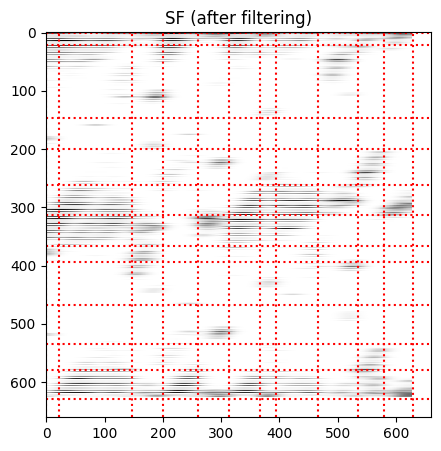

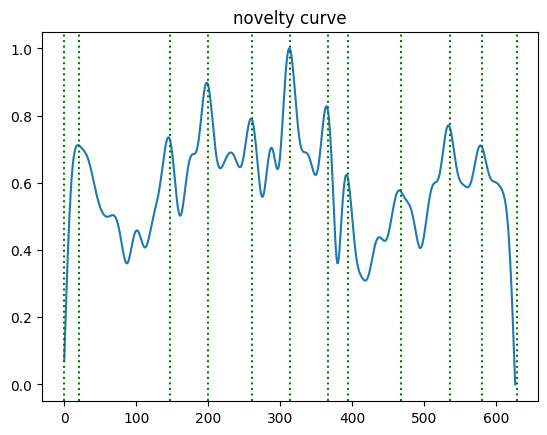

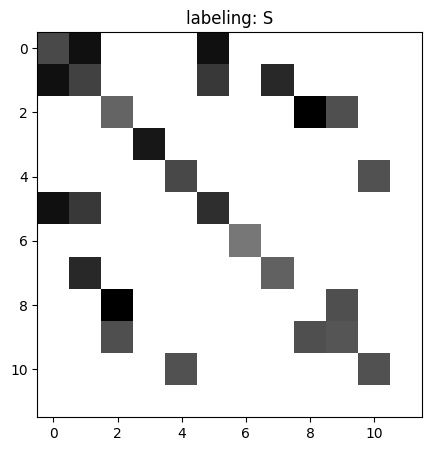

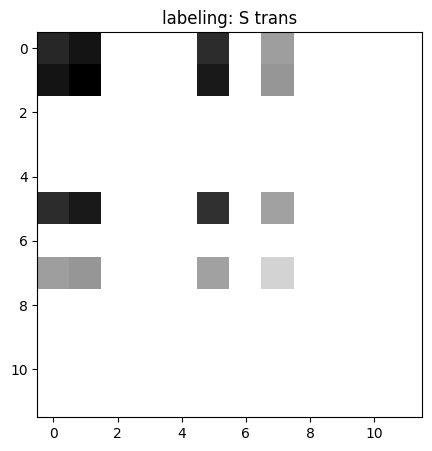

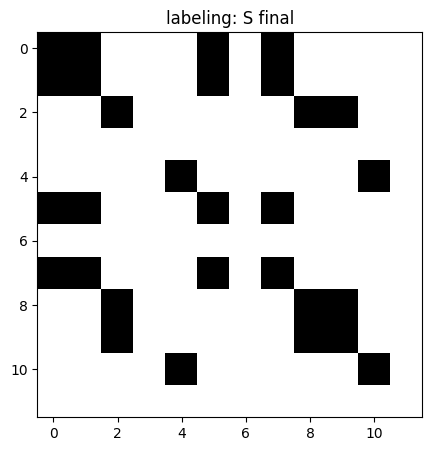

In [13]:
def plot_feats(
        F=None,
        R=None,
        L=None,
        SF=None,
        nc=None,
        S=None,
        S_trans=None,
        S_final=None,
        boundaries=None,
        outdir=None,
        vis_bounds=False):

    if outdir:
        os.makedirs(outdir, exist_ok=True)
    print(' [o] save to ...', outdir)
        
    # plot input feature
    if F is not None:
        plt.figure()
        plt.imshow(F.T, interpolation="nearest", aspect="auto")
        plt.title('input feature')
        if outdir:
            plt.savefig(os.path.join(outdir, 'input.png'))
        # plt.show()

    # plot recurrence plot (R)
    if R is not None:
        plt.figure(figsize=(5, 5))
        plt.imshow(R, interpolation="nearest", cmap=plt.get_cmap("binary"))
        if vis_bounds and boundaries is not None:
            [plt.axvline(p, color="red", linestyle=':') for p in boundaries]
            [plt.axhline(p, color="red", linestyle=':') for p in boundaries]
        plt.title('recurrence plot')
        if outdir:
            plt.savefig(os.path.join(outdir, 'R.png'))
        # plt.show()

    # plot time-lag (L)
    if L is not None:
        plt.figure(figsize=(5, 5))
        plt.imshow(L, interpolation="nearest", cmap=plt.get_cmap("binary"))
        if vis_bounds and boundaries is not None:
            [plt.axvline(p, color="red", linestyle=':') for p in boundaries]
            [plt.axhline(p, color="red", linestyle=':') for p in boundaries]
        if outdir:
            plt.savefig(os.path.join(outdir, 'L.png'))
        # plt.show()

    #  plot smoothed time-lag (SF)
    if SF is not None:
        plt.figure(figsize=(5, 5))
        plt.imshow(SF.T, interpolation="nearest", cmap=plt.get_cmap("binary"))
        plt.title('SF (after filtering)')
        if vis_bounds and boundaries is not None:
            [plt.axvline(p, color="red", linestyle=':') for p in boundaries]
            [plt.axhline(p, color="red", linestyle=':') for p in boundaries]
        if outdir:
            plt.savefig(os.path.join(outdir, 'SF.png'))
        # plt.show(block=False))

    # plot novelty cureve (nc)
    if nc is not None:
        plt.figure()
        plt.plot(nc)
        if boundaries is not None:
            [plt.axvline(p, color="green", linestyle=':') for p in boundaries]
        plt.title('novelty curve')
        if outdir:
            plt.savefig(os.path.join(outdir, 'nc.png'))
        # plt.show()

    # labeling features
    if S is not None:
        plt.figure(figsize=(5, 5))
        plt.imshow(S, interpolation="nearest", cmap=plt.get_cmap("binary"))
        if outdir:
            plt.savefig(os.path.join(outdir, 'lab_S.png'))
        plt.title('labeling: S')

    if S_trans is not None:
        plt.figure(figsize=(5, 5))
        plt.imshow(S_trans, interpolation="nearest", cmap=plt.get_cmap("binary"))
        if outdir:
            plt.savefig(os.path.join(outdir, 'lab_S_trans.png'))
        plt.title('labeling: S trans')

    if S_final is not None:
        plt.figure(figsize=(5, 5))
        plt.imshow(S_final, interpolation="nearest", cmap=plt.get_cmap("binary"))
        if outdir:
            plt.savefig(os.path.join(outdir, 'lab_S_final.png'))
        plt.title('labeling: S final')

    plt.show()


plot_feats(
            F=segmenter.F,
            R=segmenter.R,
            L=segmenter.L,
            SF=segmenter.SF,
            nc=segmenter.nc,
            S=segmenter.S,
            S_trans=segmenter.S_trans,
            S_final=segmenter.S_final,
            boundaries=segmenter.boundaries,
            outdir=None,
            vis_bounds=True)

#print(f'{segmenter.F=} \n {segmenter.R=} \n {segmenter.L=} \n {segmenter.SF=} \n {segmenter.nc=} \n {segmenter.S=} \n {segmenter.S_trans=} \n {segmenter.S_final=} \n {segmenter.boundaries=}')